# NOTEBOOK 3 — Visualizations for Correlation

In [1]:
#from previous Notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("FC26_20250921.csv")
cols_needed = [
    "player_id",
    "short_name",
    "age",
    "nationality_name",
    "player_positions",
    "overall",
    "potential",
    "value_eur",
    "pace",
    "shooting",
    "passing",
    "dribbling",
    "defending",
    "physic"
]
df_no_gk = df[~df["player_positions"].str.contains("GK", na = False)]
df_filtered = df_no_gk[cols_needed]
df_filtered.head()
df_filtered.loc[:, "player_positions"] = (
    df_filtered["player_positions"]
    .str.split(",")
    .str[0]
    .str.strip()
)
df_filtered

/tmp/ipykernel_512/632554218.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FC26_20250921.csv")


,player_id,short_name,age,nationality_name,player_positions,overall,potential,value_eur,pace,shooting,passing,dribbling,defending,physic
0,252371,J. Bellingham,22,England,CAM,90,94,174500000,80.0,86.0,83.0,90.0,78.0,85.0
1,239053,F. Valverde,26,Uruguay,CM,89,90,120500000,88.0,84.0,84.0,84.0,83.0,85.0
2,212622,J. Kimmich,30,Germany,CDM,89,89,86000000,72.0,74.0,89.0,84.0,83.0,79.0
3,235212,A. Hakimi,26,Morocco,RB,89,90,111000000,92.0,79.0,82.0,83.0,82.0,79.0
4,224232,N. Barella,28,Italy,CM,87,87,79500000,80.0,78.0,84.0,86.0,81.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16945,275651,Peng Xiao,19,China PR,CB,48,61,100000,53.0,27.0,28.0,29.0,48.0,57.0
16969,77910,Zhang Zhaozhi,21,China PR,CB,48,55,90000,60.0,21.0,25.0,32.0,48.0,58.0
17049,273641,Sun Guoliang,34,China PR,CB,51,51,20000,39.0,23.0,33.0,30.0,58.0,44.0
17060,274116,Jo Hyun Tae,20,Korea Republic,CB,49,61,110000,43.0,23.0,29.0,32.0,49.0,59.0


## **Visualizations for Exploration & Correlation**

### Line Plots of Market Value and Attributes

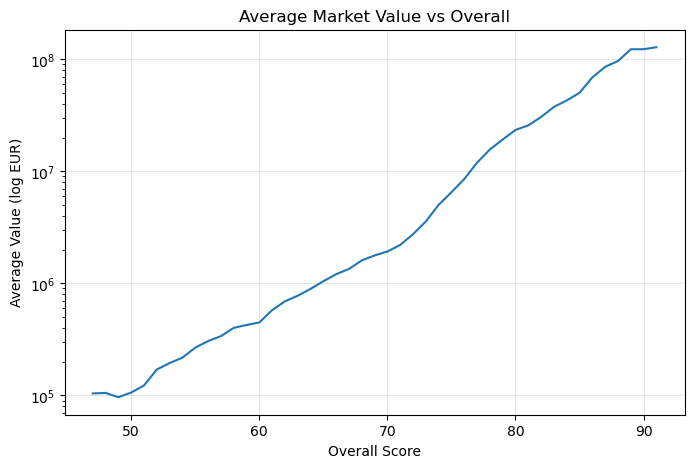

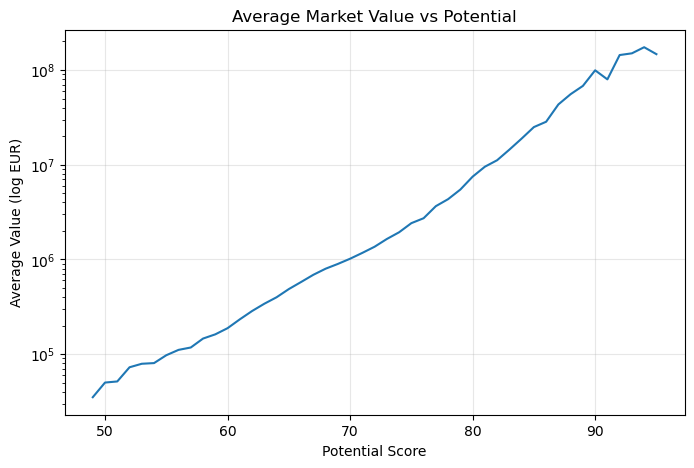

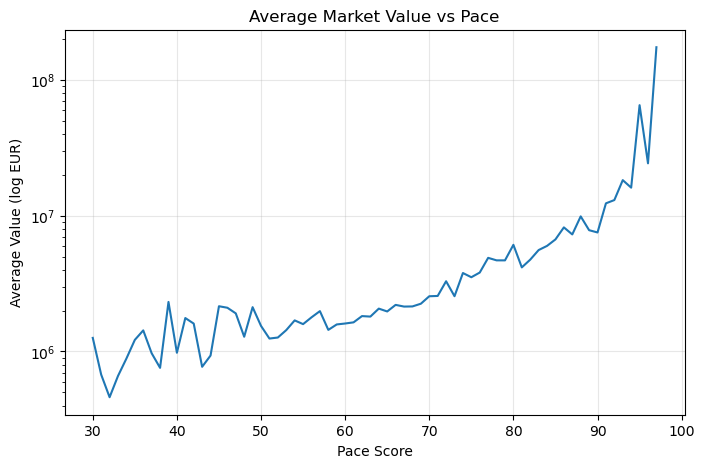

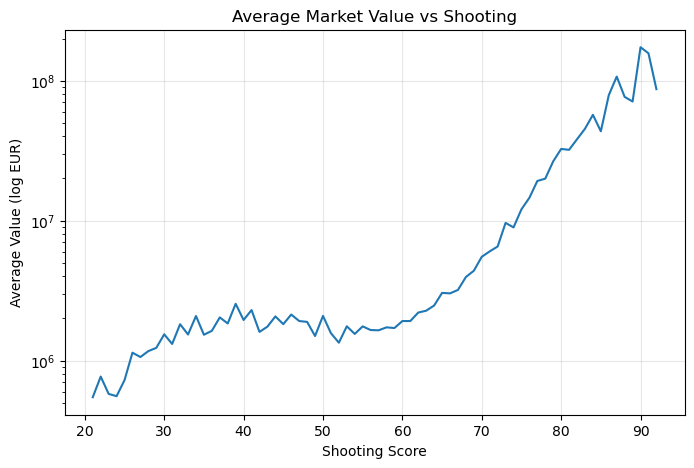

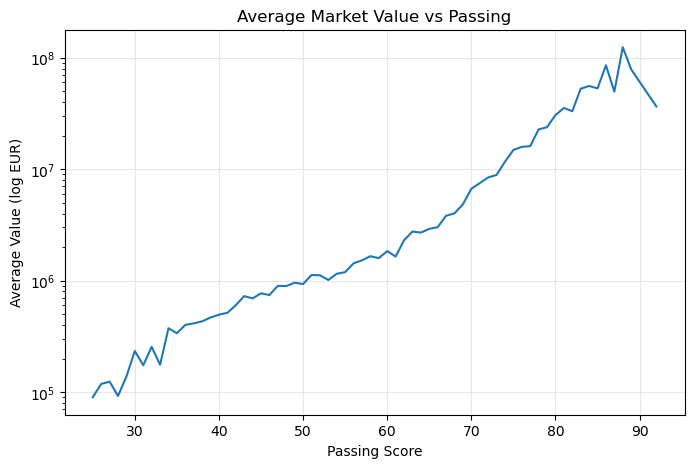

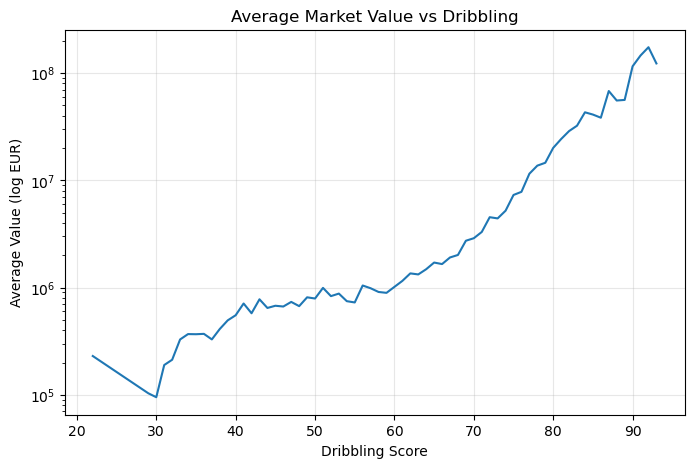

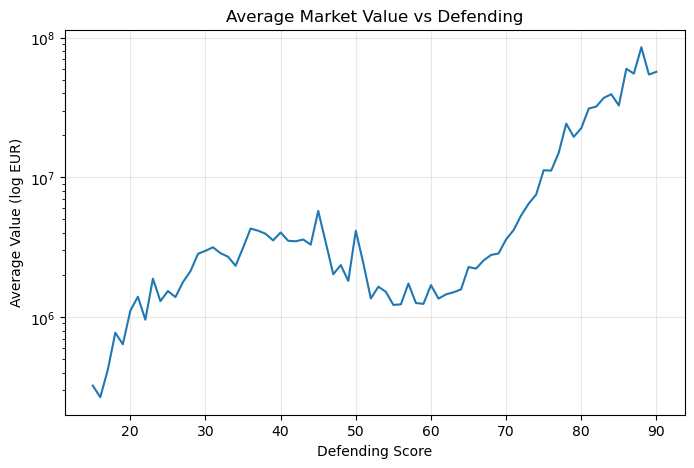

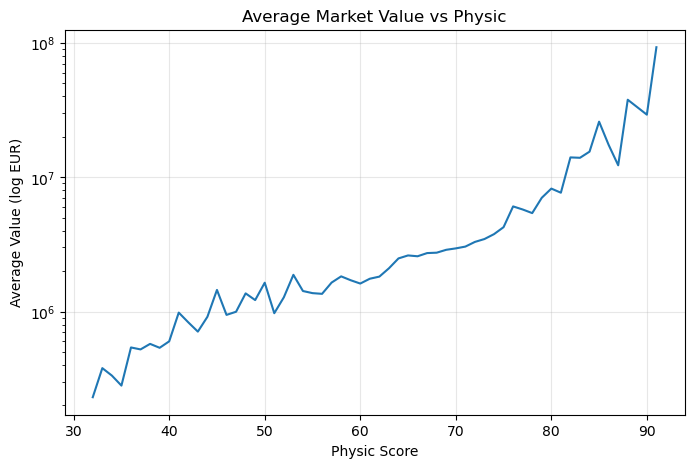

In [2]:
# array of different attributes of a player
attributes = ["overall", "potential", "pace", "shooting", "passing",
              "dribbling", "defending", "physic"]

# iterates through each attribute
for attr in attributes:
# groups by attribute and average market value
    grouped = df_filtered.groupby(attr)["value_eur"].mean()
    plt.figure(figsize = (8,5))
    plt.plot(grouped.index, grouped.values)
    plt.yscale("log")
    plt.xlabel(f"{attr.capitalize()} Score")
    plt.ylabel("Average Value (log EUR)")
    plt.title(f"Average Market Value vs {attr.capitalize()}")
    plt.grid(alpha=0.3)
    plt.show()

The line graphs display players' average market value by the attributes score. All have an upward trend, which is completely expected. However, when zooming in on the change in gradient at certain areas, we can see that defending and shooting have a slight, inverted, upward "s-shaped" trend. This is because attacking players tend to have lower defending scores, yet are still highly valued, and defending players tend to have lower shooting scores, yet are still highly valued. 

### Bar Graph of Top 15 Nation and Relation to Player Market Values

/tmp/ipykernel_512/2874221748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


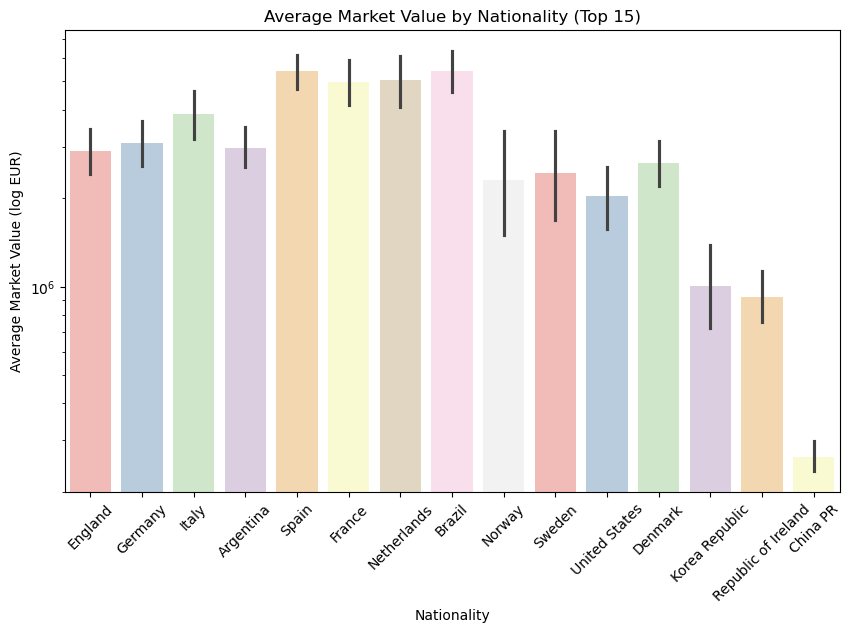

In [3]:
# selects top 15 nations
top_nations = df_filtered["nationality_name"].value_counts().head(15).index
# makes a new dataframe of top 15 nations
nations_df = df_filtered[df_filtered["nationality_name"].isin(top_nations)]

plt.figure(figsize = (10,6))
sns.barplot(
    data = nations_df, 
    x = "nationality_name", 
    y = "value_eur", 
    estimator = "mean",
    palette = "Pastel1"
)
# changes market value to be represented in terms of log for readability
plt.yscale("log")
plt.title("Average Market Value by Nationality (Top 15)")
plt.xticks(rotation = 45)
plt.xlabel("Nationality")
plt.ylabel("Average Market Value (log EUR)")
plt.show()


This bar graph displays the top 15 nationality and their relationship to their players' average market value. As we can see, Spain, France, the Netherlands, and Brazil dominate and produce an immense amount of high-valued players, making them, in turn, high-value countries with intense talent. On the contrary, Korea Republic, the Republic of Ireland, and China are "lacking" in producing high-valued players (most likely due to fewer individuals from the country going into the Soccer "work-field").

### Correlation Matrix of Player Market Value and Player In-game Attributes

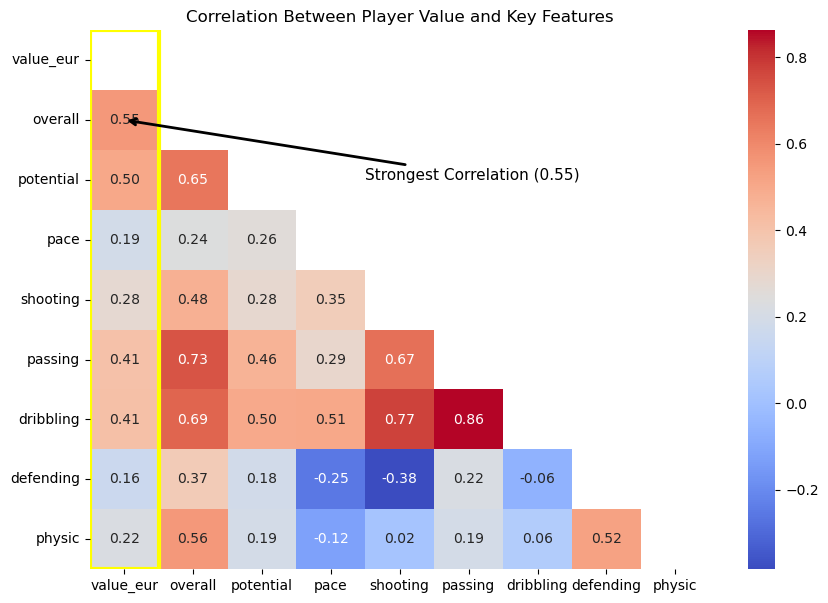

In [14]:
plt.figure(figsize=(10,7))
corr = df_filtered[["value_eur"] + attributes].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    mask=mask
)

plt.title("Correlation Between Player Value and Key Features")
# highlights the first column
num_rows = corr.shape[0]
rect = plt.Rectangle(
    (0, 0),              
    1,                   
    num_rows,            
    fill=False,
    edgecolor="yellow",
    linewidth=3
)
ax.add_patch(rect)
# finds the box of the "overall" and "value_eur"
row_idx = corr.index.get_loc("overall")
col_idx = corr.columns.get_loc("value_eur")

# annotation of arrow and text
ax.annotate(
    "Strongest Correlation (0.55)",
    xy=(col_idx + 0.5, row_idx + 0.5),     
    xytext=(col_idx + 4, row_idx + 1.5),  
    arrowprops=dict(arrowstyle="->", lw=2),
    fontsize=11,
    ha="left"
)

plt.show()


This confusion matrix displays the strength of the relationship between two attributes. As we can see, **"overall" and "potential" are the most determinative of a player's value**. This is expected because a player with a higher overall means they are "better overall". A player who is "better" is valued higher. Also, dribbling and passing have the highest correlation strength.

#### Since Overall influences player market value the most, how does a player's age affect their overall and market value?

### Scatter Plot of Correlation between Player Age and Player Overall

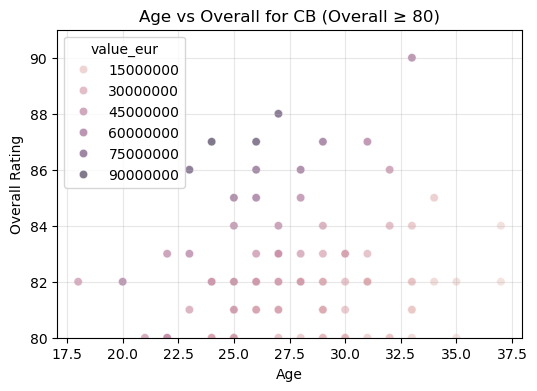

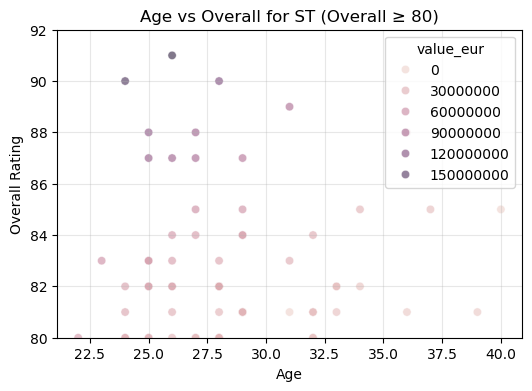

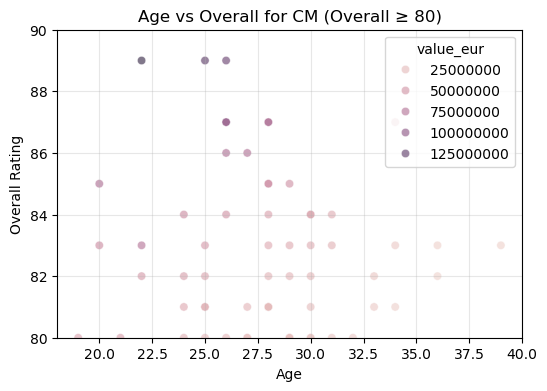

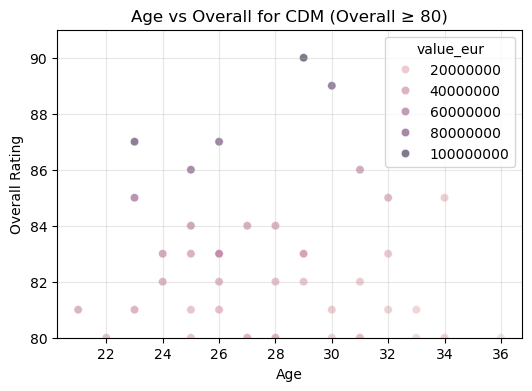

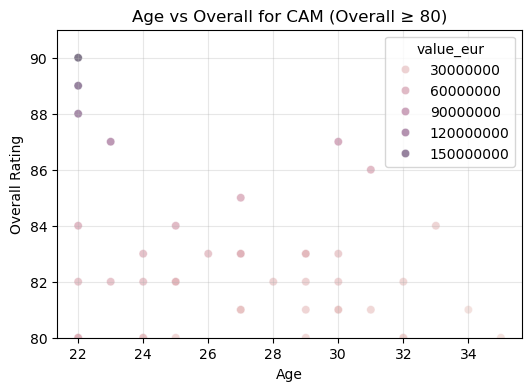

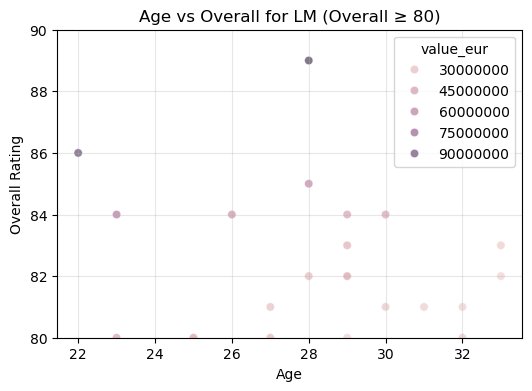

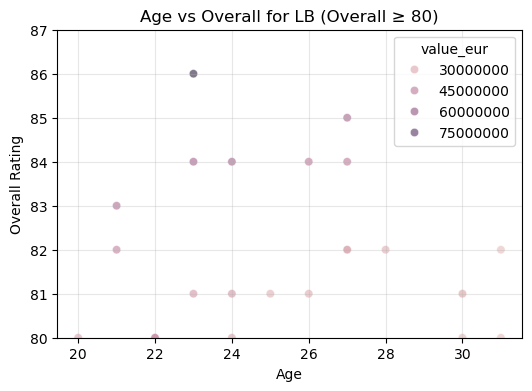

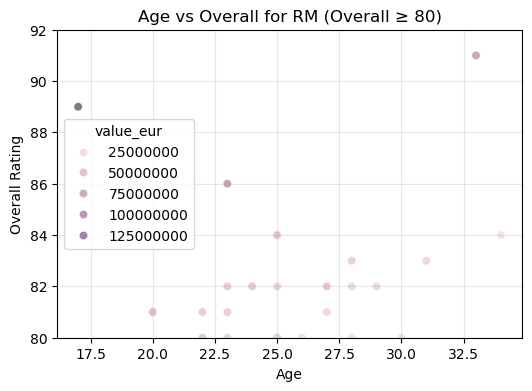

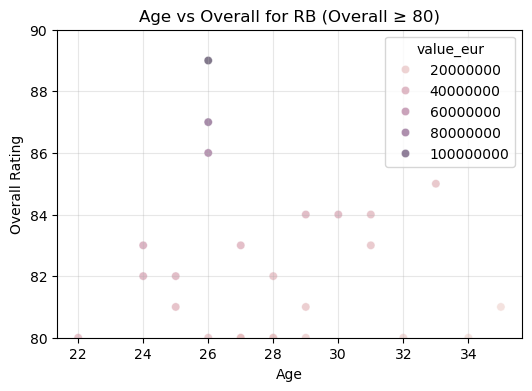

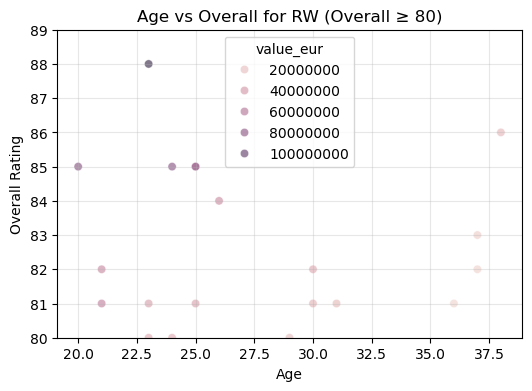

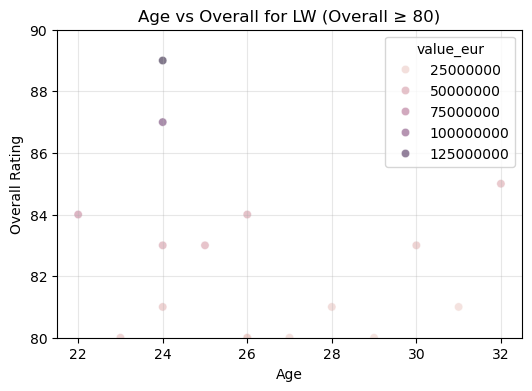

In [16]:
# makes a copy dataframe of players above the overall of 80
df_80 = df_filtered[df_filtered["overall"] >= 80].copy()
#counts how many player in each of the different positions
top_positions = df_80["player_positions"].value_counts().index
# makes a subset of players that are above 80 overall in each position 
subset_80 = df_80[df_80["player_positions"].isin(top_positions)]

#iterates through each positions
for pos in top_positions:
# changes figure size
    plt.figure(figsize = (6,4))
# creates new dataframe if the position being iterated equals the position in the row 
    df_pos = subset_80[subset_80["player_positions"] == pos]

    sns.scatterplot(
        data=df_pos,
        x = "age",
        y = "overall",
        hue = "value_eur",
        alpha = 0.6
    )

    plt.title(f"Age vs Overall for {pos} (Overall ≥ 80)")
    plt.xlabel("Age")
    plt.ylabel("Overall Rating")
# zooms into plot when overall is 80 and above
    plt.ylim(80, df_pos["overall"].max() + 1)
    plt.grid(alpha = 0.3)
    plt.show()


I decided to view how age affects a player's overall and market value independently in each position because certain positions require more or less fitness, which in turn is affected by a player's age. As the scatter plots display higher overall means and higher market value, but we knew that already. We also knew that the average soccer player's age is 25. With this information being given, the scatterplots display that between the ages of 22 and 28 is when a player's market value is generally at its peak. Thus, making those the "most expensive ages".

#### Diving a bit further, what is the split of high overall players and whether their positions prefer certain ages over others?

### Scatter Plot of Correlation between Player Age and Player Market Value

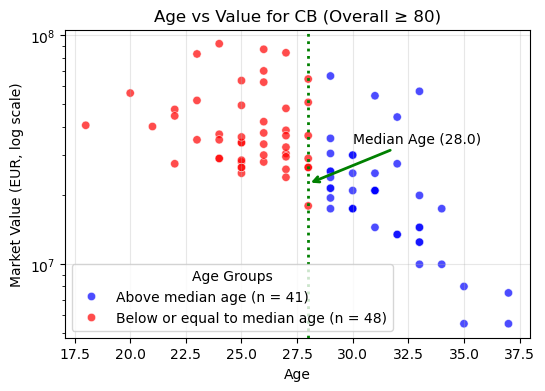

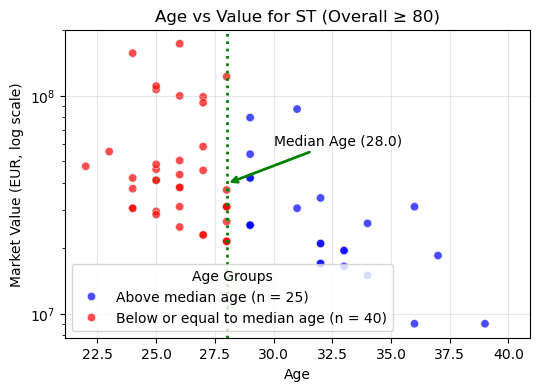

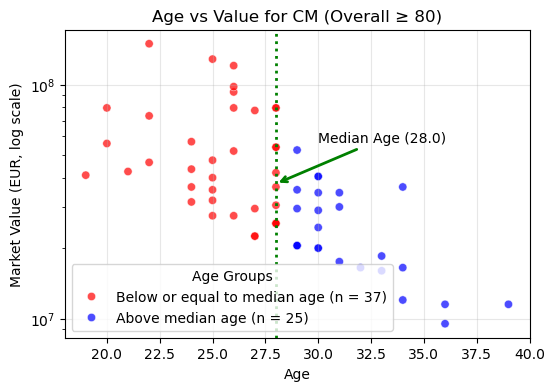

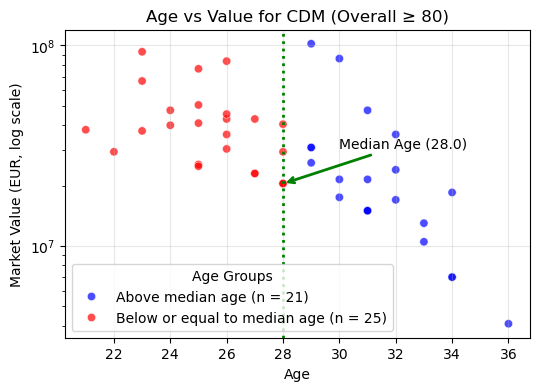

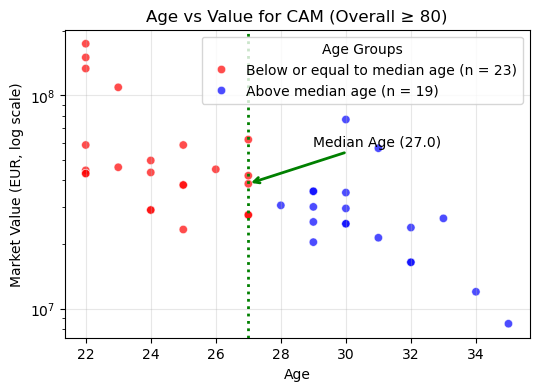

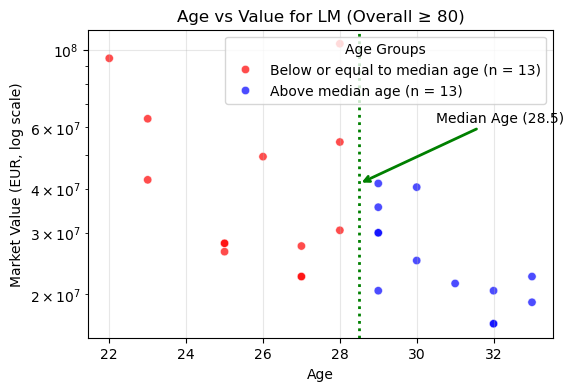

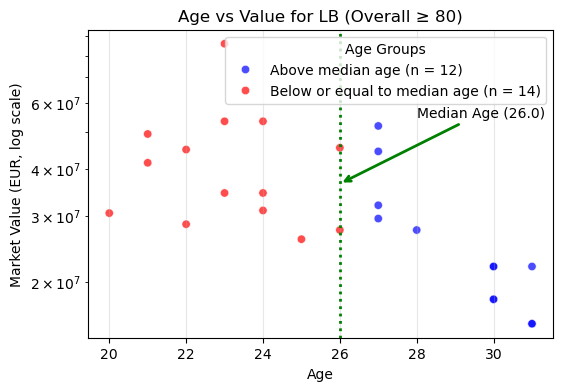

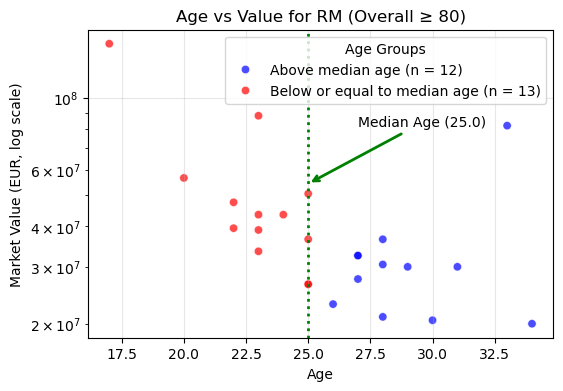

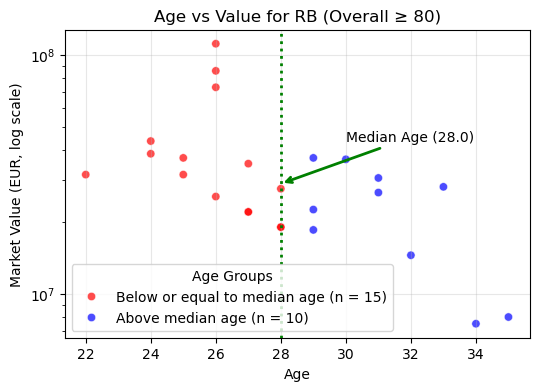

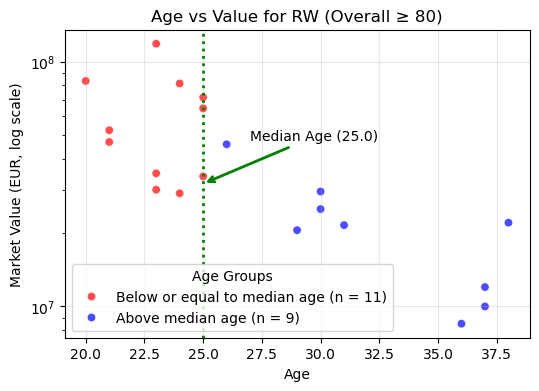

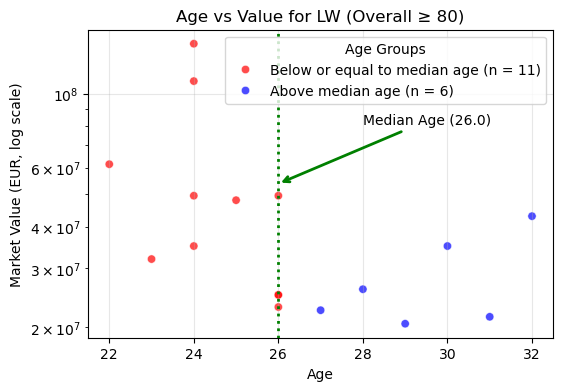

In [21]:
for pos in top_positions:
    df_pos = subset_80[subset_80["player_positions"] == pos].copy()
# finds median age of position being iterated
    median_age = df_pos["age"].median()
# counts how many players are above and below the median age in the position being iterated
    below_count = (df_pos["age"] <= median_age).sum()
    above_count = (df_pos["age"] > median_age).sum()
# makes age group label for legend
    df_pos["age_group"] = np.where(
        df_pos["age"] <= median_age,
        f"Below or equal to median age (n = {below_count})",
        f"Above median age (n = {above_count})"
    )
    
# assigns age group to color
    custom_palette = {
        f"Below or equal to median age (n = {below_count})": "red",
        f"Above median age (n = {above_count})": "blue"
    }
    
    plt.figure(figsize = (6,4))
    sns.scatterplot(
        data = df_pos,
        x = "age",
        y = "value_eur",
        hue = "age_group",
        alpha = 0.7,
        palette = custom_palette
    )
    
    plt.yscale("log")
# median age line with arrow and annotation
    plt.axvline(median_age, linestyle = ":", color = "green", linewidth = 2)
    ymin, ymax = plt.ylim()
    y_mid = (ymin * ymax) ** 0.5

    plt.annotate(
        f"Median Age ({median_age:.1f})",
        xy = (median_age, y_mid),
        xytext = (median_age + 2 if median_age + 2 < plt.xlim()[1] else median_age - 2,
                  y_mid * 1.5 if y_mid * 1.5 < plt.ylim()[1] else y_mid / 1.5),
        arrowprops = dict(arrowstyle = "->", color = "green", lw = 2),
        fontsize = 10,
        ha = "left"
    )

    plt.title(f"Age vs Value for {pos} (Overall ≥ 80)")
    plt.xlabel("Age")
    plt.ylabel("Market Value (EUR, log scale)")
    plt.grid(alpha = 0.3)
#finds the best location of legend (covers the least amount of data points)
    plt.legend(title = "Age Groups", loc = "best")
    plt.show()

The following scatterplot splits all high overall players into two categories: young and old. This is determined by finding the median age in each position, and if a player's age is below the median, then they are deemed as "young" and the contrary for "old" players. In almost all positions, we can see that there is a downward trend between a player's market value and age. While this is expected, understanding the split between a player's age and their position is new information. As we can see in the LW (left wing), RB (right back), CM (center midfield), and ST (striker) positions, younger players are drastically more preferred than older players.